In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("E:\\dataset\\Human Resources.csv")
df.head()

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,06-04-91,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,04-08-19,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10-12-10,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,04-10-05,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,04-11-94,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan


In [3]:
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['hire_date'] = pd.to_datetime(df['hire_date'])
df['termdate'] = pd.to_datetime(df['termdate'], errors='coerce')

In [4]:
df1 = df.drop(['termdate'], axis=1)

In [5]:
print(df1.isnull().sum())

id                0
first_name        0
last_name         0
birthdate         0
gender            0
race              0
department        0
jobtitle          0
location          0
hire_date         0
location_city     0
location_state    0
dtype: int64


In [6]:
print(df1.describe(include='all'))

                id first_name last_name            birthdate gender   race  \
count        22214      22214     22214                22214  22214  22214   
unique       22214       7758     17754                10854      3      7   
top     00-0037846     Cassie    Ducker  2072-05-09 00:00:00   Male  White   
freq             1         12         7                    9  11288   6328   
first          NaN        NaN       NaN  1965-10-16 00:00:00    NaN    NaN   
last           NaN        NaN       NaN  2073-12-12 00:00:00    NaN    NaN   

         department               jobtitle      location            hire_date  \
count         22214                  22214         22214                22214   
unique           13                    185             2                 7016   
top     Engineering  Research Assistant II  Headquarters  2009-07-06 00:00:00   
freq           6686                    754         16715                   10   
first           NaN                    NaN      

C:\Users\User\AppData\Local\Temp\ipykernel_20436\3376403218.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df1.describe(include='all'))
C:\Users\User\AppData\Local\Temp\ipykernel_20436\3376403218.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df1.describe(include='all'))


In [7]:
df1.head()

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,location_city,location_state
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,Cleveland,Ohio
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,Cleveland,Ohio
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,Flint,Michigan


# Gender_Counts

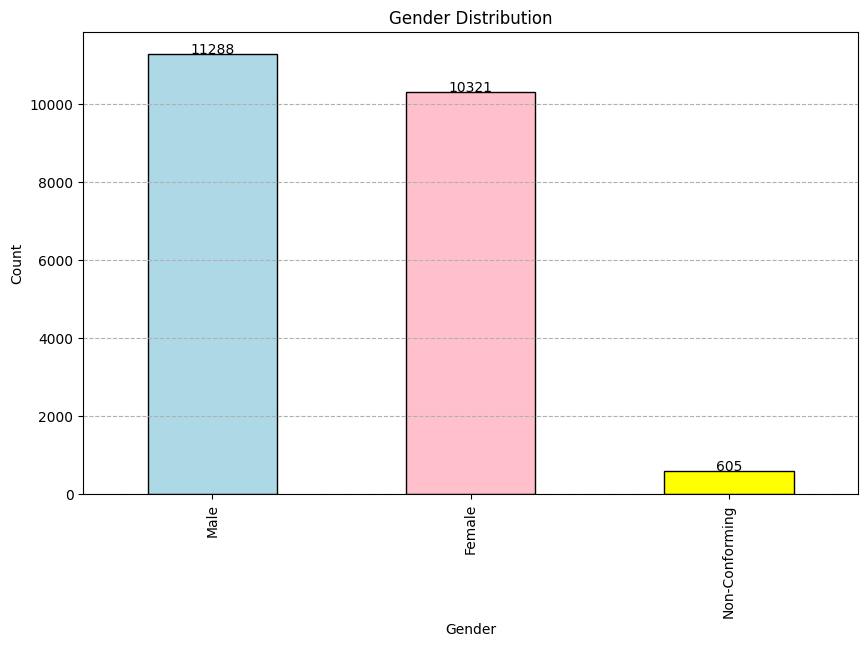

In [7]:
gender_c = df['gender'].value_counts()

plt.figure(figsize=(10, 6))
ax = gender_c.plot(kind='bar', color=['lightblue', 'pink' , 'yellow'] , edgecolor = "black")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=1)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center',
                xytext=(0, 3),
                textcoords='offset points')
plt.show()

# Race Counts

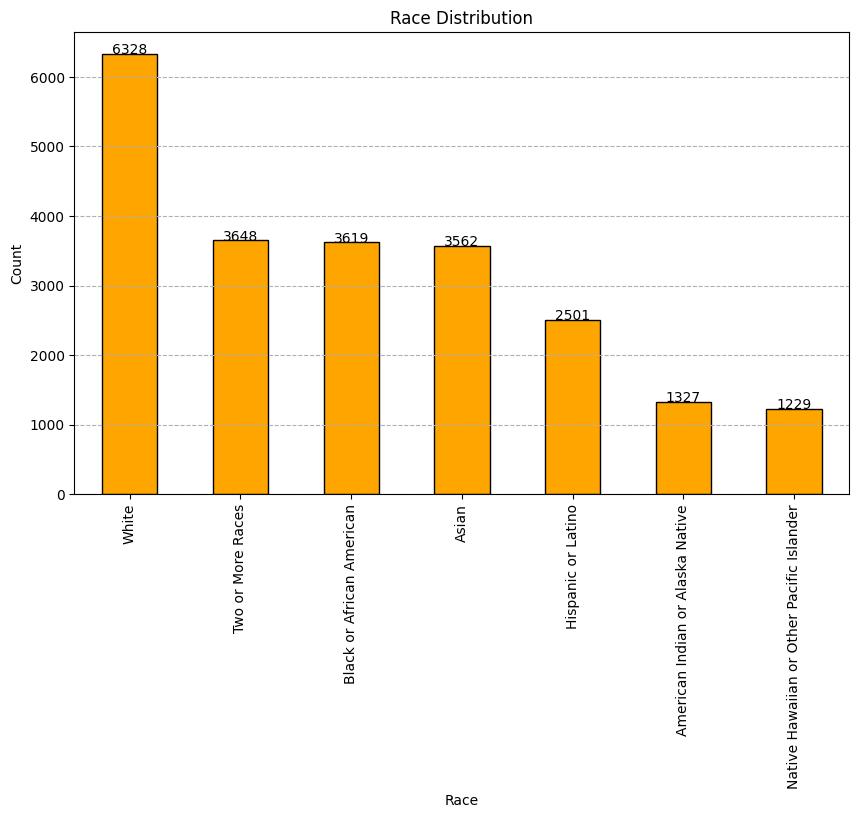

In [9]:
race_counts = df['race'].value_counts()

plt.figure(figsize=(10, 6))
ax = race_counts.plot(kind='bar', color='orange' , edgecolor = "black")
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=1)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center',
                xytext=(0, 3),
                textcoords='offset points')
plt.show()

# Department VS Job Title

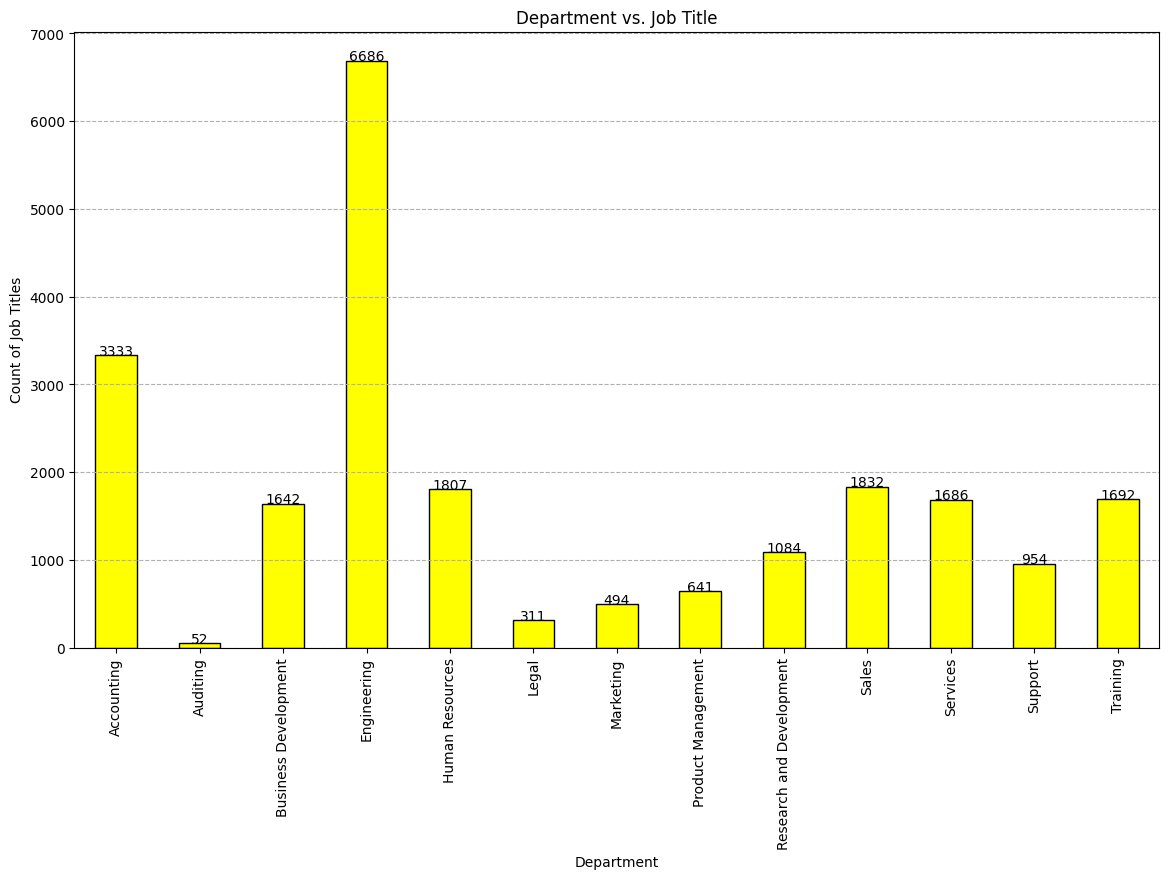

In [11]:
plt.figure(figsize=(14, 8))
department_jobtitle = df.groupby('department')['jobtitle'].count()
ax = department_jobtitle.plot(kind='bar', color='yellow' , edgecolor = 'black')
plt.title('Department vs. Job Title')
plt.xlabel('Department')
plt.ylabel('Count of Job Titles')
plt.grid(axis='y', linestyle='--', alpha=1)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center',
                xytext=(0, 3),
                textcoords='offset points')
plt.show()

# Age Calculation

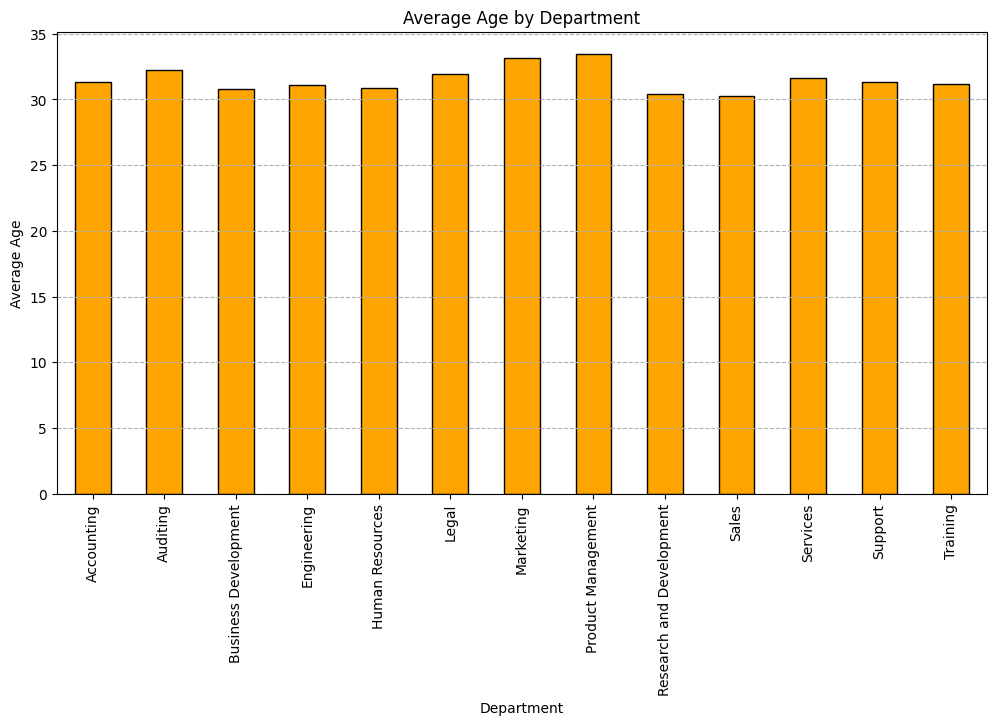

In [13]:
df['age'] = (pd.Timestamp.now() - df['birthdate']).dt.days // 365
avg_age_department = df.groupby('department')['age'].mean()

plt.figure(figsize=(12, 6))
avg_age_department.plot(kind='bar', color='orange' , edgecolor = "black")
plt.title('Average Age by Department')
plt.xlabel('Department')
plt.ylabel('Average Age')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

<Figure size 1400x800 with 0 Axes>

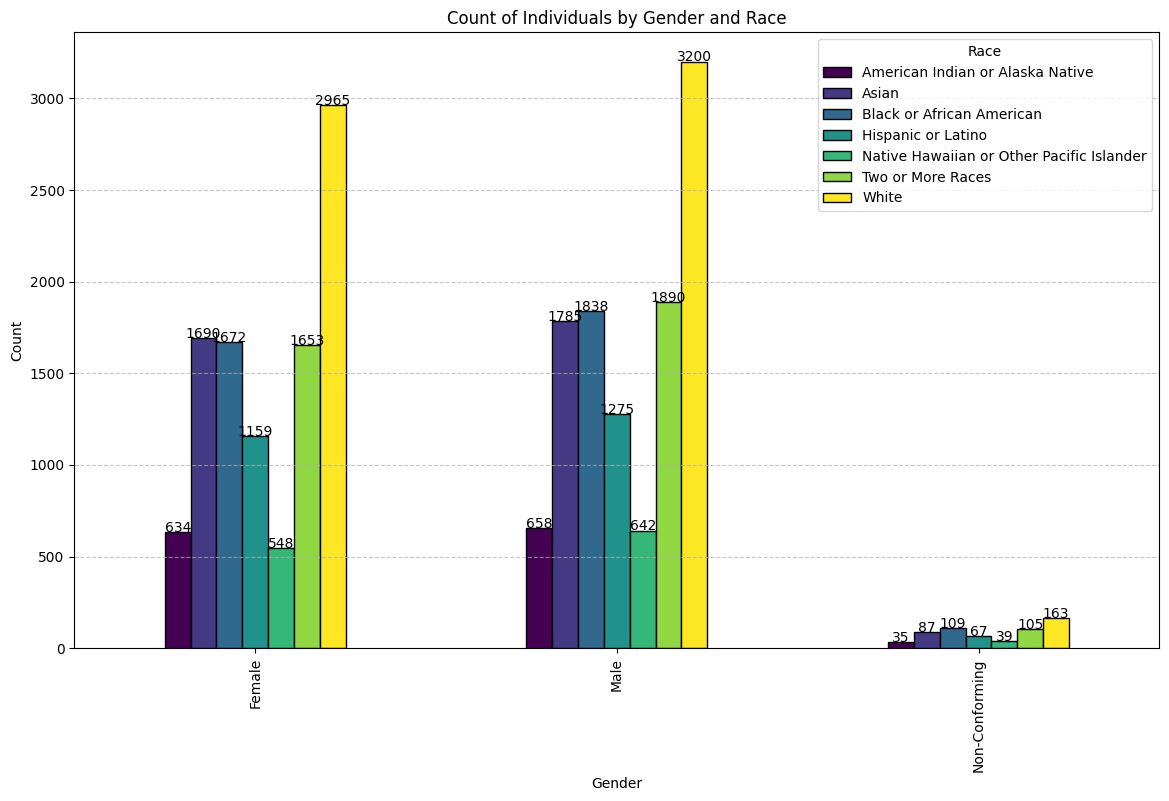

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(14, 8))
gender_race_count = df.groupby(['gender', 'race']).size().unstack()
ax = gender_race_count.plot(kind='bar', figsize=(14, 8), colormap='viridis', edgecolor='black')
plt.title('Count of Individuals by Gender and Race')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center',
                xytext=(0, 3),
                textcoords='offset points')
plt.legend(title='Race')
plt.show()